# [Homework 1](https://www.cdslab.org/DMC2021F/homework/1-intro-data) : Introduction and getting to know the data

**1.** Version-control using Git and GitHub [(Only Part 1)](https://www.cdslab.org/recipes/programming/vcs-using-git-github/vcs-using-git-github#problem-part-1)

- [my DMC gihub repo](https://github.com/citgua/DMC2021F/blob/main/README.md)

**2.** What is Data Mining?

- Data mining is being able to extract knowledge from massive amount of data.

**3.** How is a data warehouse different from a database? How are they similar?

- DB used to collect and store smaller amount of data while DW is best suited to handle and analyze larger data. DW is capable to accomadate to multiple applications while DB is typically constraint to one.
- Both manage data in similar formats such as tables and data types.

**4.** Explain the difference and similarity between classification and regression.

- Both classification and regression are tools used to analyze unseen patterns in data (predictive mining). Both are categorized as supervised learning algorithms under Machine Learning as well. 
- However, classification is disctrete regression (predicts values such as gender) while regression is continuous(values such as temp).

**5.** Outliers are often discarded as noise. However, one person’s garbage could be another’s treasure. For example, exceptions in credit card transactions can help us detect the fraudulent use of credit cards. Using fraudulence detection as an example, propose two methods that can be used to detect outliers and discuss which one is more reliable.

- Statistical Modeling (Model-Based Method): Outliers are points that don't fit to the model such as if transaction shows abnormal buying patterns.
- DBSCAN (Clustering - ML method): Discriminant method that detects densely packed regions of the space and marks the data points in low-density areas as anomalous.
- The DBSCAN algorithm is sensitive to its configuration but performs well after parameter optimization. Unsupervised methods can be useful in situations where there is no prior knowledge of classes of observations.

**6.** What is a Data Tuple?

- It is a data object stored in a database. Usually described in a table as a single row that holds all the data for an individual object.

**7.** What are the major challenges of mining a huge amount of data (e.g., billions of tuples) in comparison with mining a small amount of data (e.g., data set of a few hundred tuple)?

- Tuple size is consider to pick right technoques to improve performance and efficiency of measurements and results. When mining larger amount of data,some major challenges to overcome is the scabability and increasing processing of algorithms.

**8.** Name the common kinds of attributes and provide an example for each.

- Nominal (Categorical): symbols or names such as states
- Binary (Nominal of two categories 0 or 1): Boolean -True/False
- Ordinal: size ranking , school grading system
- Numerical: longitude-latitude(location), temperature (scale)
- Continuous (any value within a range): height
- Discrete (countable infinite): zip codes

**9.** Consider this weighted dataset comprised of 500 observations (tuples) each of each is described by 5 attributes. Note that the last column of data is the weight of each tuple. **Compute the weighted mean of this sample.**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_9.txt', sep=",") 

In [3]:
df

,attr1,attr2,attr3,attr4,attr5,weight
0,0.537667,0.537667,0.537667,0.537667,0.537667,4.905454e-03
1,1.833885,1.833885,1.833885,1.833885,1.833885,2.254622e-06
2,-2.258847,-2.258847,-2.258847,-2.258847,-2.258847,2.915424e-08
3,0.862173,0.862173,0.862173,0.862173,0.862173,1.575709e-03
4,0.318765,0.318765,0.318765,0.318765,0.318765,7.838398e-03
...,...,...,...,...,...,...
495,-0.608557,-0.608557,-0.608557,-0.608557,-0.608557,4.003653e-03
496,-0.737060,-0.737060,-0.737060,-0.737060,-0.737060,2.598462e-03
497,-1.749879,-1.749879,-1.749879,-1.749879,-1.749879,4.785660e-06
498,0.910483,0.910483,0.910483,0.910483,0.910483,1.272033e-03


In [4]:
#weighted mean formula
def wm(att,weight):
    wm_formula = (df[att]*df[weight]).sum()/df[weight].sum()
    return wm_formula

In [5]:
wm("attr1","weight")

0.00937035632001312

In [6]:
print("Weighted mean:")
for col in df.columns[:-1]:
    print(col+":",wm(col,"weight"))

Weighted mean:
attr1: 0.00937035632001312
attr2: 0.00937035632001312
attr3: 0.00937035632001312
attr4: 0.00937035632001312
attr5: 0.00937035632001312


**10.** Consider this dataset comprised of 1000 observations (tuples). 

**Compute the first four standardized moments of this sample (mean, standard deviation, skewness, kurtosis).**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

In [8]:
#calculating using formulas provided
def mean(data): 
      n = len(data)
      mean = sum(data) / n
      return mean

def variance(data):
   
  n = len(data)
   
  mean = sum(data) / n
   
  deviations = [(x - mean) ** 2 for x in data]
    
  variance = sum(deviations) / n
  return variance

def stdev(data):
      import math
      var = variance(data)
      std_dev = math.sqrt(var)
      return std_dev

def skw(data):
    d=(sum((data-mean(data))**3)/len(data))/stdev(data)**3
    return d
def kurt(data):
    d=(sum((data-mean(data))**4)/len(data))/stdev(data)**4
    return d


In [9]:
df_2 = pd.read_csv('data_10.txt', sep=",")
x_axis=df_2["sample"].tolist() #range

In [10]:
df_2.describe()

,sample
count,1000.000000
mean,2.127795
std,2.088665
min,0.001194
25%,0.677911
50%,1.493907
75%,2.880746
max,14.031026


In [11]:
#calcualating mean and standard deviation using numpy 
np.mean(df_2.values)
print("n_mean:",np.mean(df_2.values))
print("n_std:",np.std(df_2.values))

n_mean: 2.1277952714163515
n_std: 2.0876207870467125


In [12]:
# Calculating mean and standard deviation using statistics mod
s_mean = statistics.mean(x_axis)
s_std = statistics.stdev(x_axis)

print("s_mean:",s_mean)
print("s_std:",s_std)

s_mean: 2.1277952714163515
s_std: 2.088665380950984


In [13]:
#calcualating mean and std using formulas
print("Calculated mean:",mean(x_axis))
print("Calculated std:",stdev(x_axis))

Calculated mean: 2.1277952714163515
Calculated std: 2.0876207870467134


Sample Distribution


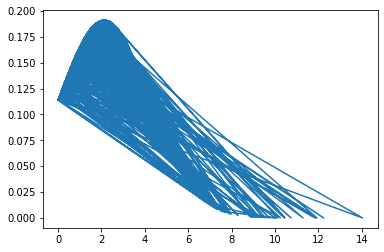

In [14]:
print("Sample Distribution")
plt.plot(x_axis, norm.pdf(x_axis,mean(x_axis), stdev(x_axis)))
plt.show()

Standarizing Data:

In [17]:
ndf=(df_2-mean(x_axis))/stdev(x_axis)
nx_axis=ndf["sample"].tolist() #range

Stan mean: -1.3378187446733136e-17
Stan std: 0.9999999999999992
Stan skewness: 1.9066028261720387
Stan kurtosis: 7.670778393167046

Standard Normal  Distribution


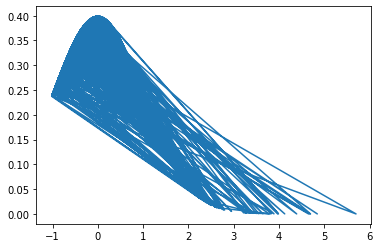

In [19]:
print("Stan mean:", mean(nx_axis)) #first moment
print("Stan std:",stdev(nx_axis)) #second moment
print("Stan skewness:",skw(ndf["sample"])) #third moment
print("Stan kurtosis:",kurt(ndf["sample"])) #fourth moment
print("\nStandard Normal  Distribution")
plt.plot(nx_axis, norm.pdf(nx_axis,mean(nx_axis),stdev(nx_axis)))
plt.show()

In [20]:
from scipy.stats import moment, skew, kurtosis

In [21]:
#The k-th central moment of standard data using scipy
mmt=dict()
mmt["mean"]=moment(ndf['sample'],moment=1)
mmt["std"]=moment(ndf['sample'],moment=2)
mmt["skewness"]=moment(ndf['sample'],moment=3)
mmt["kurtosis"]=moment(ndf['sample'],moment=4)

In [22]:
mmt_df = pd.DataFrame([mmt], columns=mmt.keys())
mmt_df

,mean,std,skewness,kurtosis
0,0.0,1.0,1.906603,7.670778


In [23]:
skew(ndf['sample'],bias=False) #3rd momemnt if using skew from stats

1.9094682227598787

In [24]:
kurtosis(ndf['sample'],bias=False) #4th moment if using kurtosis from stats

4.700240724567135

Sample has a psotively-skewed distribution (skew >0) and positive excess kurtosis (playkurtic). 